1. En Machine Learning existen problemas característicos como clasificación, regresión, clustering y reducción de dimensionalidad. Para  cada uno de estos problemas existen modelos con estructuras algorítmicas diferentes. Algunos ejemplos de estas estructuras para los problemas mencionados son:

    KNN

    Regresión lineal

    K-Means

    PCA

    Para cada tipo de problema consulte otro algoritmo que sea de uso común. Explique brevemente el funcionamiento de los cuatro algoritmos dados en el enunciado y los cuatro investigados.


Respuesta:

- Clasificación: 
  - **KNN:** KNN calcula la distancia entre la nueva observación y todos los ejemplos en el conjunto de entrenamiento, la distancia más comúnmente utilizada es la distancia euclidiana $d(x, y) = \sqrt{\sum_{i=0}^n(x_i-y_i)^2}$. La clase de la nueva observación se determina por mayoría de votos de sus k vecinos más cercanos. Es decir, la clase más frecuente entre los vecinos es la predicción, este algoritmo también puede realizar regresiones por medio del promedio de sus k vecinos más cercanos.
  - **Regresión logística:** Es un algoritmo que busca predecir la probabilidad de un evento o de que una observación pertenezca a una clase particular, por medio de una curva de forma sigmoide $\left(\sigma(z) = \frac{1}{1+e^{-z}}\right)$, esta función retorna un valor entre 0 y 1 que representa esta probabilidad. Es llamada regresión debido a el como se encuentran sus parámetros y a que usa la combinación lineal de las variables predictorias de la forma $z = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n$
- Regresión:
  - **Regresión lineal:** Usa el método de mínimos cuadrados para buscar los coeficientes de la ecuación de la forma $\hat{y} = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n$ que minimice el error entre la recta y los puntos observados.
  - S**upport Vector Regression:** Busca una función que se ajuste a los datos de manera que las desviaciones de los puntos de datos del modelo predicho estén dentro de un margen especificado, llamado epsilon ($\epsilon$), mientras se minimiza la complejidad del modelo
- Clustering:
  - **K-Means:** Este algoritmo ubica aleatoriamente K centroides entre las observaciones, estas se asignan al centroide más cercano y luego se reubica el centroide en la media de todos los puntos pertenecientes a este, luego se iteran estos pasos hasta que los centroides dejan de cambiar. Este nos regresa una etiqueta de a cual cluster o grupo pertenece.
  - **DBSCAN:** Es un algoritmo de clustering basado en densidad que puede identificar clusters de forma arbitraria y manejar ruido (puntos que no pertenecen a ningún cluster), este no requiere el número de clusters iniciales, sino que los encuentra por sí mismo en base al radio de vecindad para definir si un punto pertenece a un cluster y el número mínimo de puntos para formar un cluster. Selecciona un punto aleatorio no visitado del conjunto de datos. Encuentra todos los puntos en la vecindad $\epsilon$ de este punto, si el número de puntos en la vecindad  es menor que el minimo de puntos, el punto se clasifica como ruido, en caso contrario se forma un nuevo cluster. Para cada punto no visitado, se considera visitado y se encuentra su vecindad $\epsilon$. Si la vecindad  del punto tiene al menos minPts puntos, se añaden al cluster, esto se itera hasta visitar todos los puntos.
- Reducción de dimensionalidad:
  - **PCA:** Se utiliza para transformar un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas, por medio de la matriz de covarianza y los vectores y valores propios se genera una especie de proyección en un plano o recta que "simplifica" la relación de los componentes.
  - **t-Distributed Stochastic Neighbor Embedding:** El objetivo de este es reducir la dimensionalidad de los datos de alta dimensión de manera que se conserve la estructura local (es decir, las relaciones de proximidad entre los puntos). Para cada par de puntos en el espacio original, se calcula una probabilidad de similaridad p_{ij} que mide la probabilidad de que el punto {j} sea un vecino del punto {i}, se calculan probabilidades de similaridad q_{ij} utilizando una distribución t de Student con un grado de libertad, Se ajustan las posiciones de los puntos en el espacio de baja dimensionalidad minimizando la divergencia KL entre las distribuciones p_{ij} y q_{ij}
​

2. ¿Qué tipo de preprocesamiento debería hacer a un conjunto de datos si quisiera usar estos algoritmos y obtener un buen desempeño? (¿Qué puede ser común para todos y que es especifico de cada uno?).

Esta respuesta claramente depende mucho de los datos, ya que pueden requerir un preprocesamiento muy específico, pero en general se puede seguir estos pasos:
- Análisis exploratorio
- Cambiar el tipo de variable en caso de tener erroneos
- Manejo de nulos
- Escalamiento (datos numéricos)
- Codificación (datos categóricos)
- Feature engineering y selección de los features más significativos

3. Investigue cómo implementar la técnica de clustering aglomerativo y úsela para encontrar una segmentación del dataset Iris. Explique su razonamiento para la elección de la altura del dendrograma y compare los resultados con los obtenidos usando k-means (¿se obtuvieron resultados similares?, si hay diferencias ¿a qué podrían deberse?).


In [53]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
iris = pd.read_csv("Taller5_iris.csv")
iris

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.drop("class", axis = 1))
iris_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [31]:
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_clusters = agglomerative.fit_predict(iris_scaled)

df = pd.DataFrame(iris.drop("class", axis=1), columns=iris.columns)
df['Agglomerative_Cluster'] = agg_clusters
df['True_Label'] = iris["class"]

df.drop("class", axis=1, inplace=True)

df

,sepal-length,sepal-width,petal-length,petal-width,Agglomerative_Cluster,True_Label
0,5.1,3.5,1.4,0.2,1,Iris-setosa
1,4.9,3.0,1.4,0.2,1,Iris-setosa
2,4.7,3.2,1.3,0.2,1,Iris-setosa
3,4.6,3.1,1.5,0.2,1,Iris-setosa
4,5.0,3.6,1.4,0.2,1,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,Iris-virginica
146,6.3,2.5,5.0,1.9,0,Iris-virginica
147,6.5,3.0,5.2,2.0,0,Iris-virginica
148,6.2,3.4,5.4,2.3,0,Iris-virginica


In [40]:
# Aplicar k-means con 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(iris_scaled)

# Agregar los clústeres k-means al DataFrame
df['KMeans_Cluster'] = kmeans_clusters

# Calcular el puntaje de silueta para ambos métodos
silhouette_avg_agg = silhouette_score(iris_scaled, agg_clusters)
silhouette_avg_kmeans = silhouette_score(iris_scaled, kmeans_clusters)
print(f"Puntaje de Silueta para aglomerativo: {silhouette_avg_agg:.3f}")
print(f"Puntaje de Silueta para k-means: {silhouette_avg_kmeans:.3f}")

df

Puntaje de Silueta para aglomerativo: 0.446
Puntaje de Silueta para k-means: 0.456


c:\Users\JUAN\anaconda3\envs\envML\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal-length,sepal-width,petal-length,petal-width,Agglomerative_Cluster,True_Label,KMeans_Cluster
0,5.1,3.5,1.4,0.2,1,Iris-setosa,1
1,4.9,3.0,1.4,0.2,1,Iris-setosa,1
2,4.7,3.2,1.3,0.2,1,Iris-setosa,1
3,4.6,3.1,1.5,0.2,1,Iris-setosa,1
4,5.0,3.6,1.4,0.2,1,Iris-setosa,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,Iris-virginica,2
146,6.3,2.5,5.0,1.9,0,Iris-virginica,0
147,6.5,3.0,5.2,2.0,0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,0,Iris-virginica,2


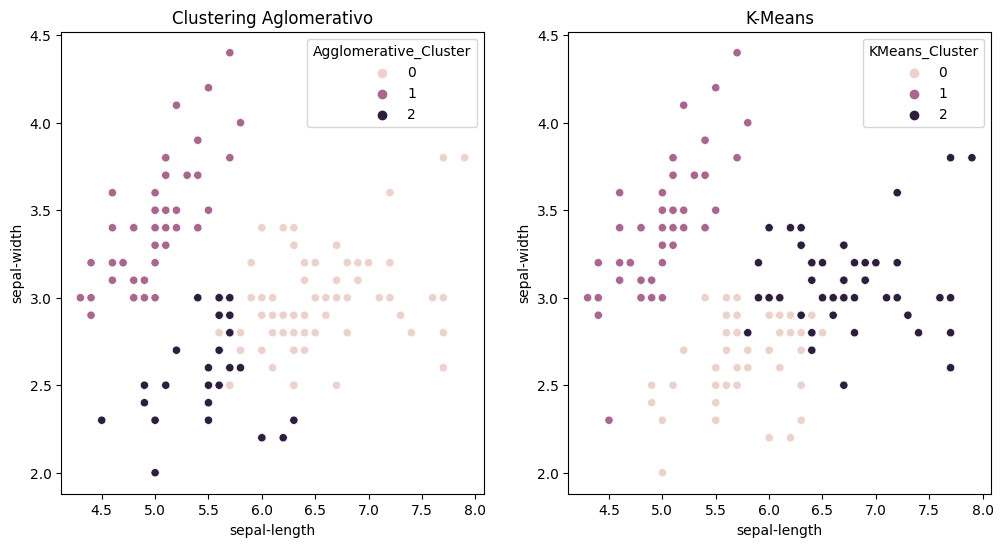

In [52]:
import seaborn as sns

# Visualización de los clústeres obtenidos con aglomerativo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

sns.scatterplot(df, x="sepal-length", y="sepal-width", hue="Agglomerative_Cluster")
plt.title("Clustering Aglomerativo")

# Visualización de los clústeres obtenidos con k-means
plt.subplot(1, 2, 2)
sns.scatterplot(df, x="sepal-length", y="sepal-width", hue="KMeans_Cluster")
plt.title("K-Means")

plt.show()


4. Realice una predicción para una flor con las siguientes características:
sepal-length = 6.22,  sepal-width = 4.3,  petal-length = 1.4, petal-width = 0.4. ¿A que especie pertenece?.

In [67]:
x = np.array([[6.22, 4.3, 1.4, 0.4]])

predicted = kmeans.predict(np.vstack([iris_scaled, scaler.transform(x)]))[-1]
predicted

c:\Users\JUAN\anaconda3\envs\envML\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1